In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
news1_df = pd.read_json('news.json',lines=True)

In [3]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
stop = stopwords.words('english')
news1_df['New']=news1_df['authors']+ ".  " +news1_df['headline']+ ".  " +news1_df["short_description"]
news1_df['New']=news1_df['New'].str.lower()
news1_df.head()

,category,headline,authors,link,short_description,date,New
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,melissa jeltsen. there were 2 mass shootings ...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,andy mcdonald. will smith joins diplo and nic...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,ron dicker. hugh grant marries for the first ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,ron dicker. jim carrey blasts 'castrato' adam...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,ron dicker. julianna margulies uses donald tr...


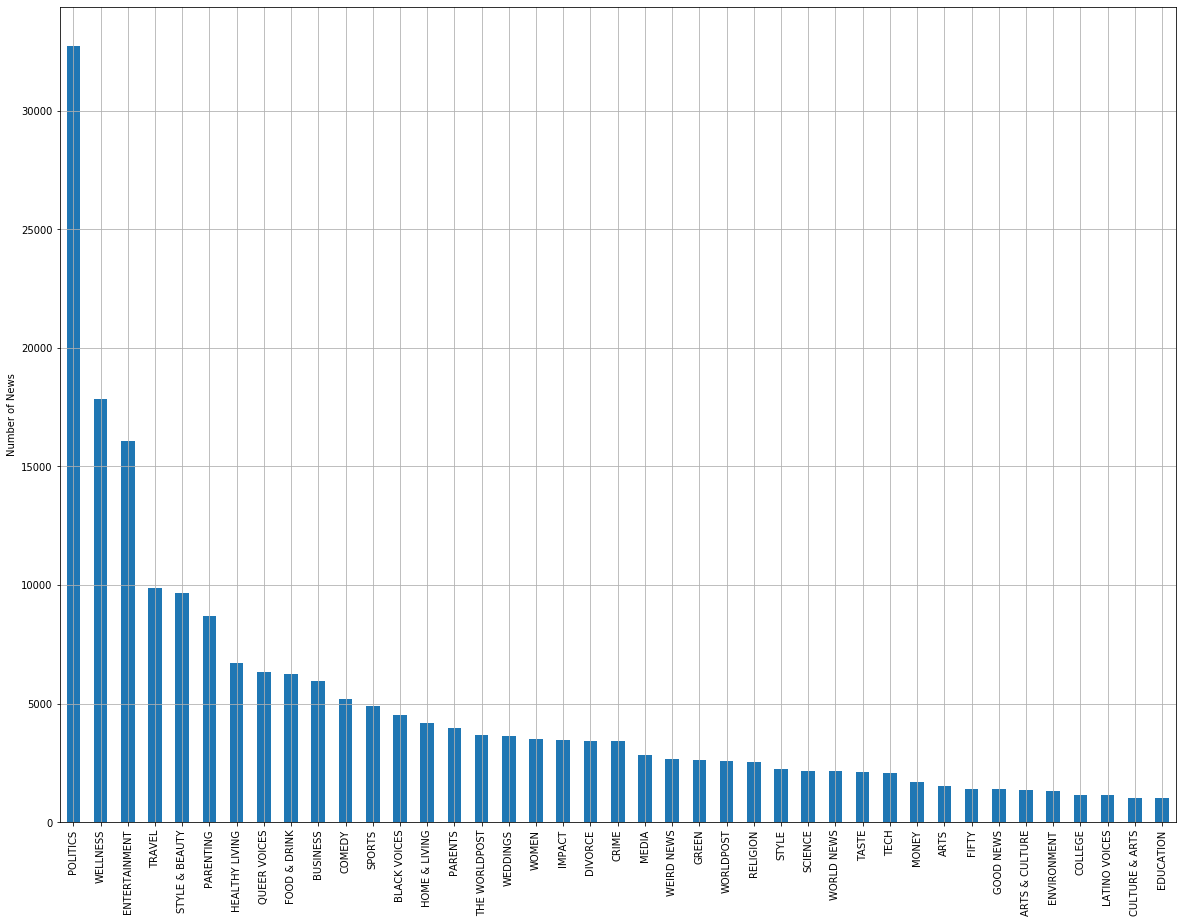

In [4]:
coun=news1_df['category'].value_counts()
coun.plot( kind='bar', figsize=(20,15))
plt.grid()
plt.ylabel('Number of News')
plt.savefig('bars.png')

In [5]:
news1_df['New_without_stopwords'] = news1_df['New'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news1_df['New_without_stopwords'][0]

'melissa jeltsen. 2 mass shootings texas last week, 1 tv. left husband. killed children. another day america.'

In [6]:
news1_df['NWSC'] = news1_df['New_without_stopwords'].str.replace('[^\w\s]','')
news1_df['NWSC'][3]

'ron dicker jim carrey blasts castrato adam schiff democrats new artwork actor gives dems asskicking fighting hard enough donald trump'

In [7]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
#------------------------------------------------------------------------------------
def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
#------------------------------------------------------------------------------------
news1_df['TL'] = news1_df['NWSC'].apply(lemmatize)
news1_df['TL'][3]

['ron',
 'dicker',
 'jim',
 'carrey',
 'blast',
 'castrato',
 'adam',
 'schiff',
 'democrat',
 'new',
 'artwork',
 'actor',
 'give',
 'dems',
 'asskicking',
 'fighting',
 'hard',
 'enough',
 'donald',
 'trump']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(news1_df['TL'][3])
X_train_counts.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0,

In [9]:
feature_names = count_vect.get_feature_names()
feature_names

['actor',
 'adam',
 'artwork',
 'asskicking',
 'blast',
 'carrey',
 'castrato',
 'democrat',
 'dems',
 'dicker',
 'donald',
 'enough',
 'fighting',
 'give',
 'hard',
 'jim',
 'new',
 'ron',
 'schiff',
 'trump']

In [10]:
pd.DataFrame(X_train_counts.toarray(), columns=feature_names)

,actor,adam,artwork,asskicking,blast,carrey,castrato,democrat,dems,dicker,donald,enough,fighting,give,hard,jim,new,ron,schiff,trump
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
count_vect.vocabulary_

{'ron': 17,
 'dicker': 9,
 'jim': 15,
 'carrey': 5,
 'blast': 4,
 'castrato': 6,
 'adam': 1,
 'schiff': 18,
 'democrat': 7,
 'new': 16,
 'artwork': 2,
 'actor': 0,
 'give': 13,
 'dems': 8,
 'asskicking': 3,
 'fighting': 12,
 'hard': 14,
 'enough': 11,
 'donald': 10,
 'trump': 19}

In [12]:
news1_df.head()

,category,headline,authors,link,short_description,date,New,New_without_stopwords,NWSC,TL
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,melissa jeltsen. there were 2 mass shootings ...,melissa jeltsen. 2 mass shootings texas last w...,melissa jeltsen 2 mass shootings texas last we...,"[melissa, jeltsen, 2, mass, shooting, texas, l..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,andy mcdonald. will smith joins diplo and nic...,andy mcdonald. smith joins diplo nicky jam 201...,andy mcdonald smith joins diplo nicky jam 2018...,"[andy, mcdonald, smith, join, diplo, nicky, ja..."
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,ron dicker. hugh grant marries for the first ...,ron dicker. hugh grant marries first time age ...,ron dicker hugh grant marries first time age 5...,"[ron, dicker, hugh, grant, marries, first, tim..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,ron dicker. jim carrey blasts 'castrato' adam...,ron dicker. jim carrey blasts 'castrato' adam ...,ron dicker jim carrey blasts castrato adam sch...,"[ron, dicker, jim, carrey, blast, castrato, ad..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,ron dicker. julianna margulies uses donald tr...,ron dicker. julianna margulies uses donald tru...,ron dicker julianna margulies uses donald trum...,"[ron, dicker, julianna, margulies, us, donald,..."


In [13]:
aut=news1_df.authors.value_counts()[1:20]
print(aut)

Lee Moran            2423
Ron Dicker           1913
Reuters, Reuters     1562
Ed Mazza             1322
Cole Delbyck         1140
Andy McDonald        1068
Julia Brucculieri    1059
Carly Ledbetter      1054
Curtis M. Wong       1020
Mary Papenfuss        974
Bill Bradley          965
Dana Oliver           936
Sam Levine            893
David Moye            893
Michelle Manetti      876
Michelle Persad       875
Nina Golgowski        868
Igor Bobic            866
Ellie Krupnick        861
Name: authors, dtype: int64


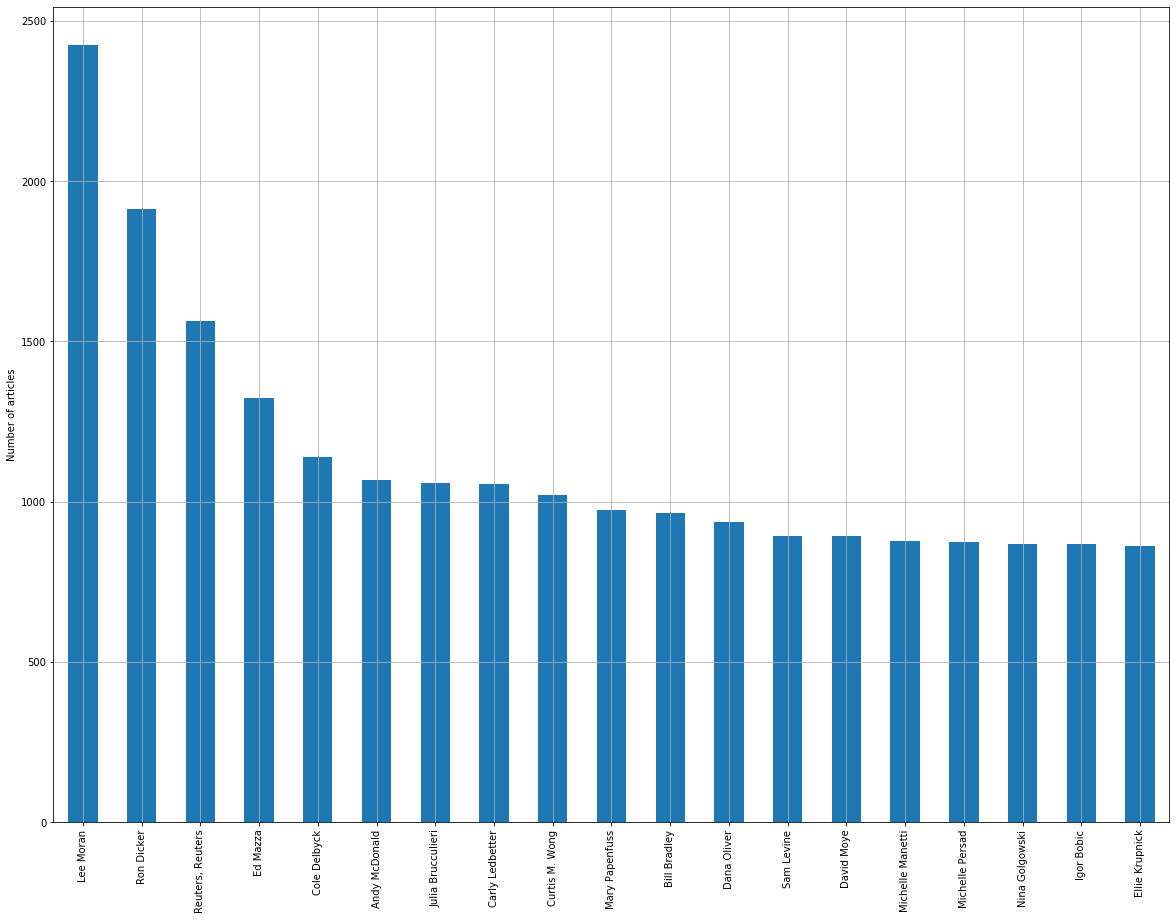

In [14]:
aut.plot( kind='bar', figsize=(20,15))
plt.grid()
plt.ylabel('Number of articles')
plt.savefig('bars1.png')

In [15]:
author_name = 'Ron Dicker'
author_number= news1_df[news1_df['authors'] == author_name]
df1 =author_number.groupby(by='category').count()

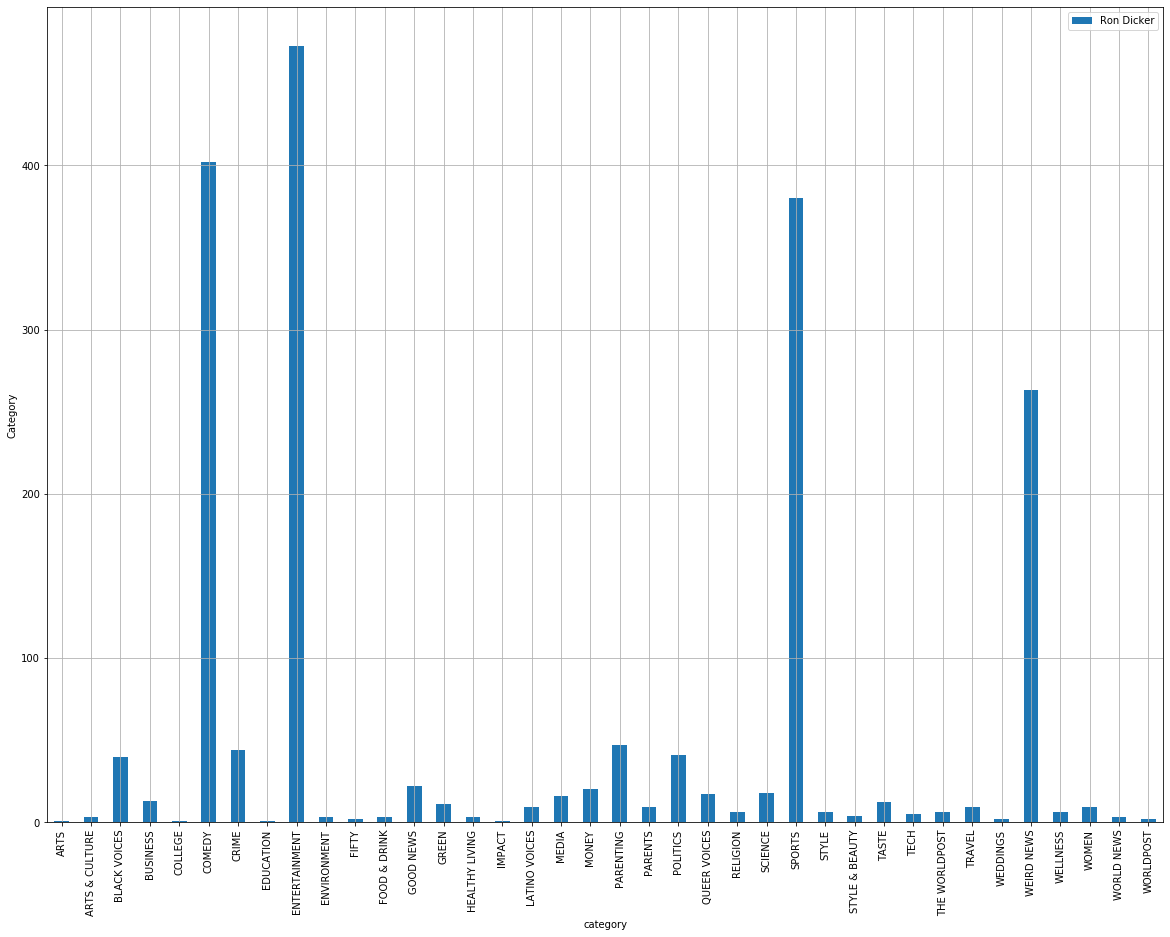

In [16]:
coun1=df1['headline']
coun1.plot( kind='bar', figsize=(20,15),label='Ron Dicker')
plt.grid()
plt.legend()
plt.ylabel('Category')
plt.savefig('bars2.png')

In [17]:
from afinn import Afinn

In [18]:
af=Afinn()

In [19]:
corpus = news1_df['NWSC']  
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [20]:
df = pd.DataFrame([list(news1_df['category']), sentiment_scores, sentiment_category]).T
df.columns = ['category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['category']).describe()

sentiment_score                                               
                         count      mean       std   min  25%  50%  75%   max
category                                                                     
ARTS                    1509.0  1.398940  3.702268 -19.0  0.0  1.0  3.0  22.0
ARTS & CULTURE          1339.0  0.609410  3.334909 -13.0 -1.0  0.0  3.0  14.0
BLACK VOICES            4528.0 -0.048807  4.370873 -25.0 -2.0  0.0  2.0  23.0
BUSINESS                5937.0  0.612431  4.217016 -19.0 -2.0  0.0  3.0  24.0
COLLEGE                 1144.0 -0.353147  4.755374 -20.0 -3.0  0.0  2.0  20.0
COMEDY                  5175.0  0.429952  3.326353 -18.0 -1.0  0.0  2.0  19.0
CRIME                   3405.0 -3.722467  3.953116 -25.0 -6.0 -3.0 -1.0   9.0
CULTURE & ARTS          1030.0  1.491262  3.706614 -15.0  0.0  1.0  3.0  17.0
DIVORCE                 3426.0  0.688850  4.177951 -19.0 -1.0  0.0  3.0  27.0
EDUCATION               1004.0  1.347610  4.153544 -19.0 -1.0  1.0  4.0  17.0
ENTERTAINMENT          16058.0  0.578279  3.567341 -19.0 -1.0  0.0  3.0  31.0
ENVIRONMENT             1323.0  0.674981  4.011165 -15.0 -2.0  0.0  3.0  20.0
FIFTY                   1401.0  2.120628  5.059829 -22.0  0.0  2.0  5.0  27.0
FOOD & DRINK            6226.0  2.498554  3.618571 -22.0  0.0  2.0  4.0  23.0
GOOD NEWS               1398.0  1.903433  3.434213 -10.0  0.0  2.0  4.0  21.0
GREEN                   2622.0 -0.131198  4.026091 -18.0 -2.0  0.0  2.0  20.0
HEALTHY LIVING          6694.0  0.995817  4.645765 -30.0 -2.0  0.0  3.0  29.0
HOME & LIVING           4195.0  2.304887  3.280666 -11.0  0.0  2.0  4.0  21.0
IMPACT                  3459.0  1.128650  4.990209 -31.0 -2.0  1.0  4.0  23.0
LATINO VOICES           1129.0  0.518158  4.082470 -19.0 -2.0  0.0  3.0  16.0
MEDIA                   2815.0 -0.913677  3.343731 -19.0 -2.0  0.0  1.0  18.0
MONEY                   1707.0  0.757469  4.422684 -18.0 -2.0  0.0  3.0  20.0
PARENTING               8677.0  1.526103  4.440417 -21.0 -1.0  1.0  4.0  25.0
PARENTS                 3955.0  1.761062  4.059784 -22.0  0.0  2.0  4.0  32.0
POLITICS               32739.0 -0.553407  3.760969 -39.0 -2.0  0.0  2.0  27.0
QUEER VOICES            6314.0  0.956921  4.170155 -28.0 -1.0  0.0  3.0  23.0
RELIGION                2556.0  0.552426  4.116312 -20.0 -1.0  0.0  3.0  20.0
SCIENCE                 2178.0  0.621212  3.226163 -15.0 -1.0  0.0  2.0  17.0
SPORTS                  4884.0  0.408477  4.038320 -19.0 -2.0  0.0  3.0  25.0
STYLE                   2254.0  1.683673  3.099723 -11.0  0.0  1.0  3.0  30.0
STYLE & BEAUTY          9649.0  2.156597  3.477337 -23.0  0.0  2.0  4.0  24.0
TASTE                   2096.0  2.316317  3.581928 -10.0  0.0  2.0  4.0  21.0
TECH                    2082.0  0.403458  3.369814 -13.0 -1.0  0.0  2.0  19.0
THE WORLDPOST           3664.0 -2.178493  3.929326 -16.0 -5.0 -2.0  0.0  14.0
TRAVEL                  9887.0  2.661374  4.044691 -14.0  0.0  2.0  5.0  30.0
WEDDINGS                3651.0  2.359901  3.948473 -14.0  0.0  2.0  5.0  24.0
WEIRD NEWS              2670.0 -0.214981  3.142345 -14.0 -2.0  0.0  2.0  20.0
WELLNESS               17827.0  1.605486  5.240124 -25.0 -1.5  1.0  5.0  33.0
WOMEN                   3490.0  0.365903  4.411602 -21.0 -2.0  0.0  3.0  23.0
WORLD NEWS              2177.0 -2.317409  3.924124 -17.0 -5.0 -2.0  0.0  14.0
WORLDPOST               2579.0 -0.892982  3.919697 -29.0 -3.0  0.0  1.0  23.0

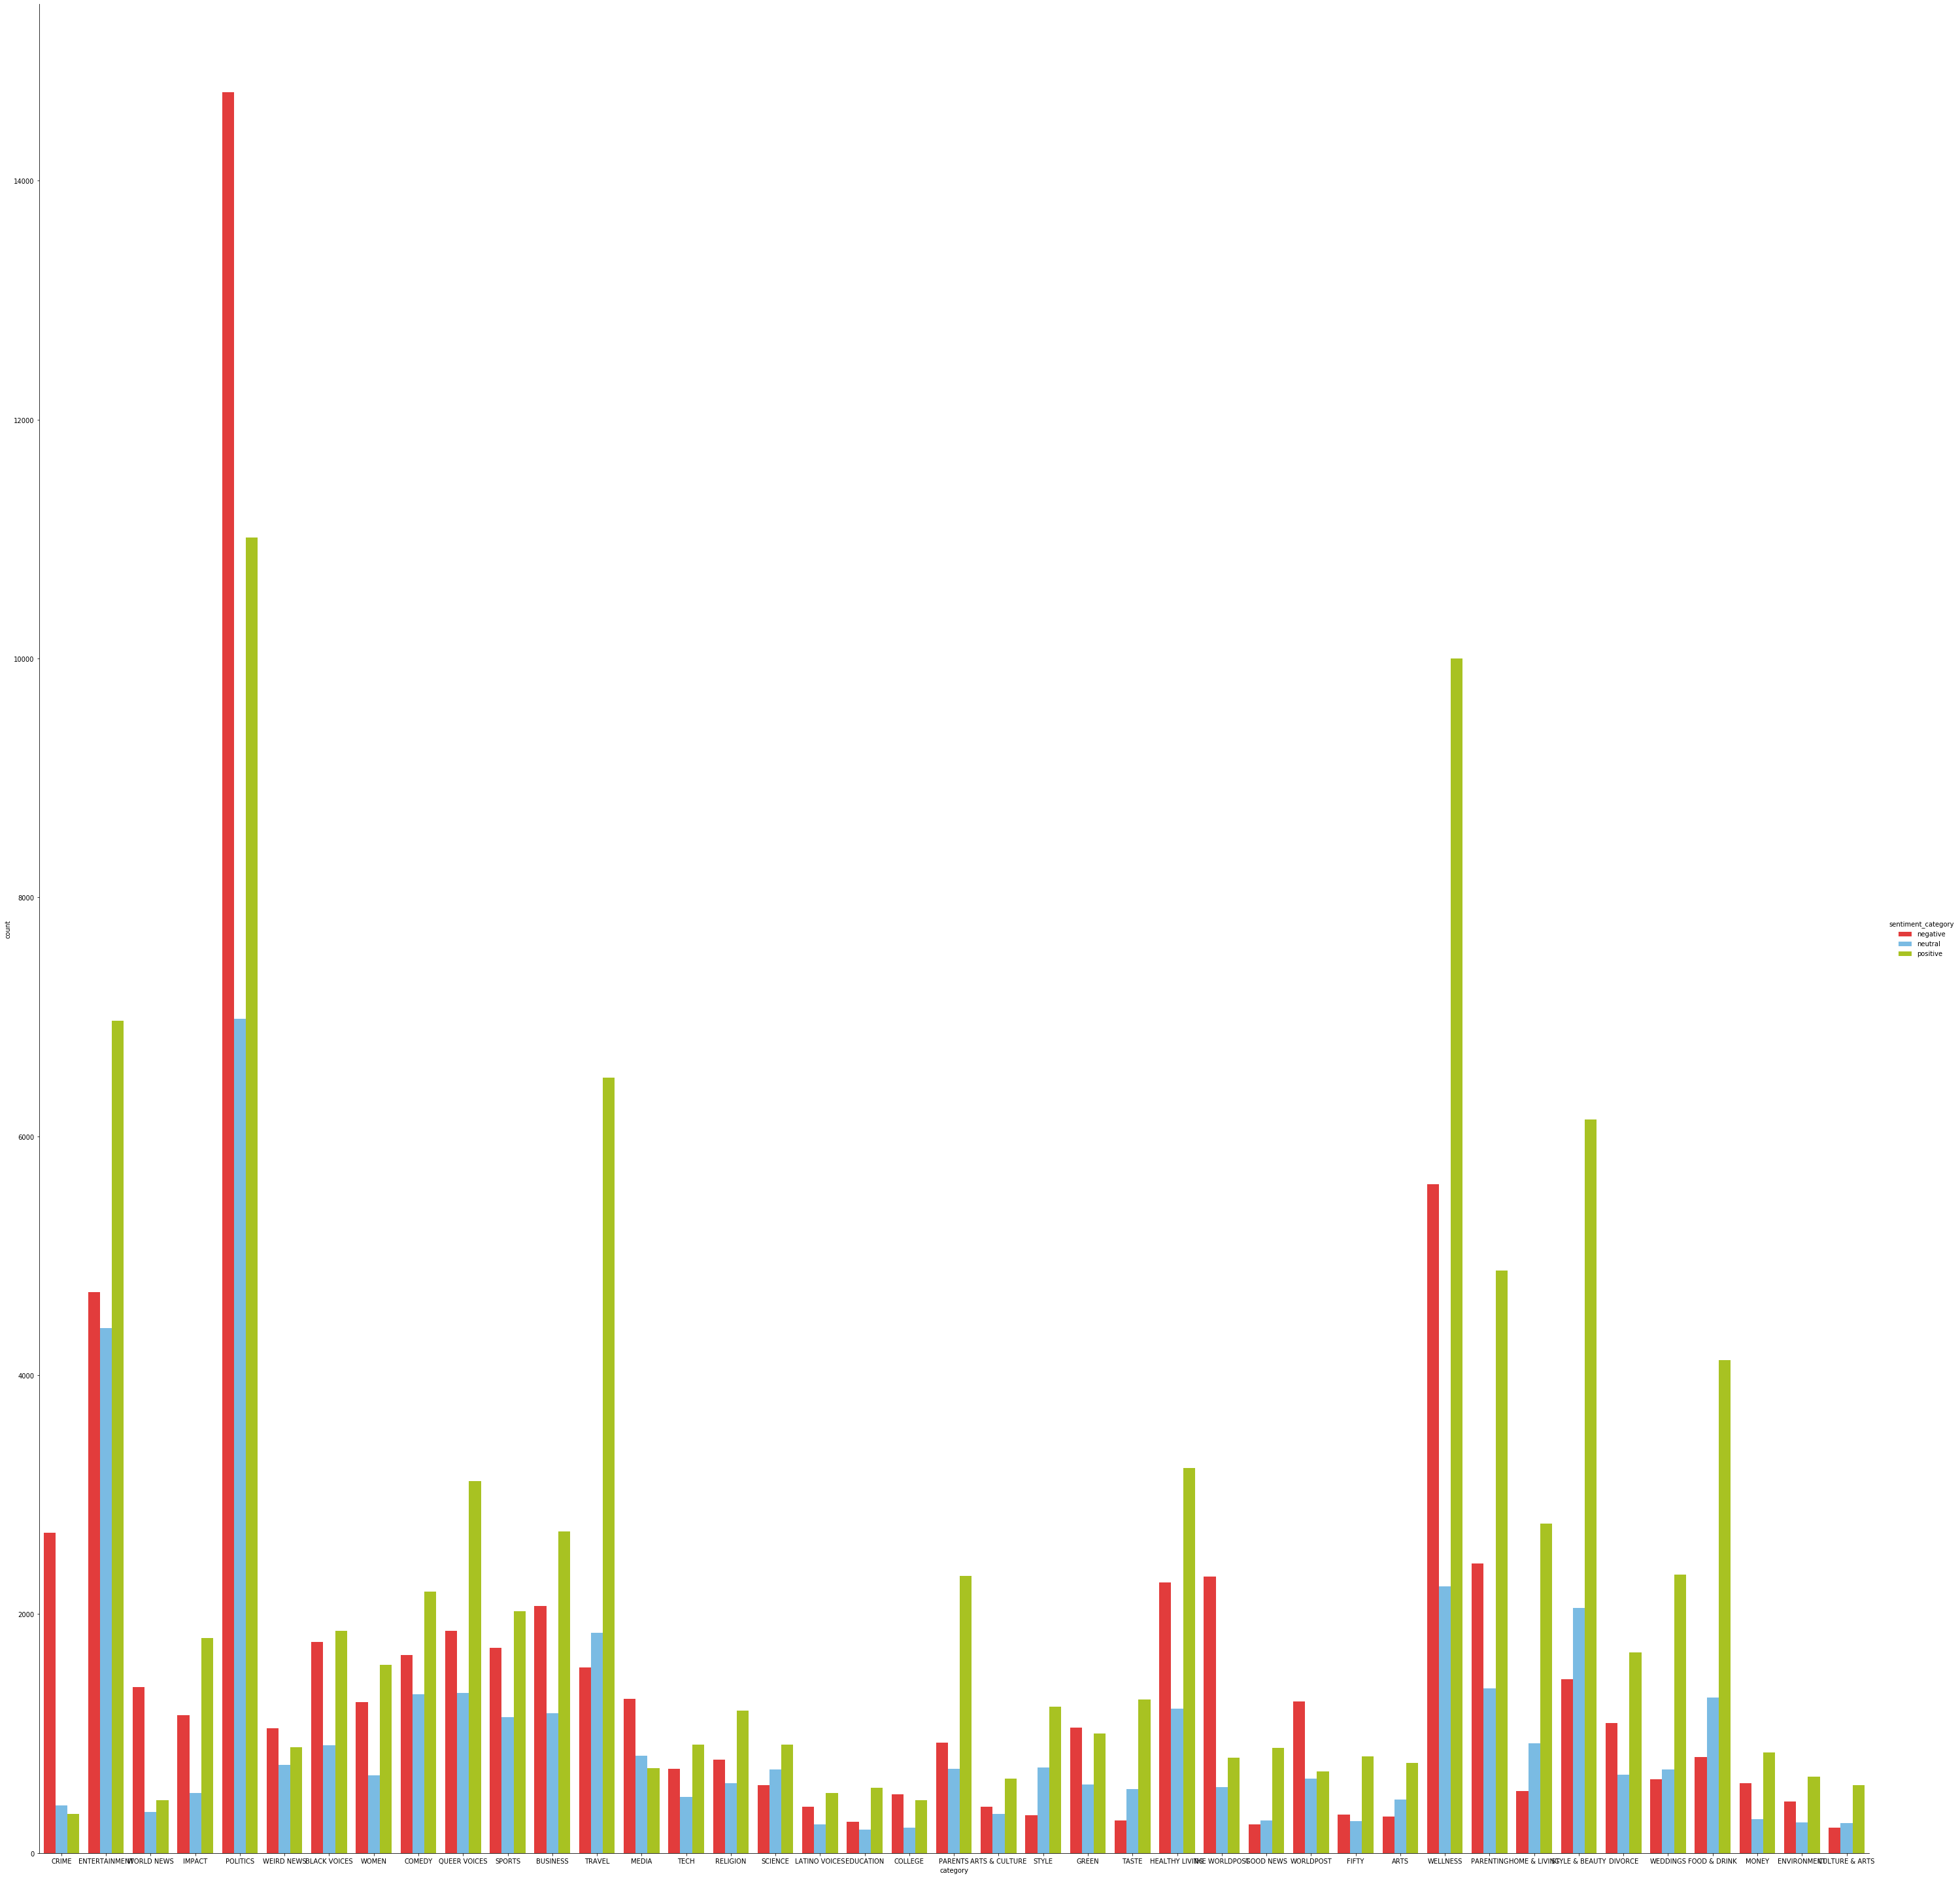

In [25]:
fc = sns.catplot(x="category", hue="sentiment_category", data=df, kind="count", height=40, palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
plt.savefig("sentiment.png")

In [26]:
df['sentiment_score']

0        -3.0
1         0.0
2         1.0
3        -3.0
4         0.0
         ... 
200848    2.0
200849   -2.0
200850    6.0
200851   -3.0
200852   -5.0
Name: sentiment_score, Length: 200853, dtype: float64

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 

In [28]:
datanp=corpus.to_numpy()
corpus1 = news1_df['TL']  
datanp1=corpus1.to_numpy()

In [29]:
datanp1.shape

(200853,)

In [30]:
vectorizer = TfidfVectorizer()

In [31]:
tv=vectorizer.fit_transform(datanp1[0])

In [32]:
print(tv)

  (0, 10)	1.0
  (1, 5)	1.0
  (3, 9)	1.0
  (4, 11)	1.0
  (5, 12)	1.0
  (6, 7)	1.0
  (7, 14)	1.0
  (9, 13)	1.0
  (10, 8)	1.0
  (11, 4)	1.0
  (12, 6)	1.0
  (13, 2)	1.0
  (14, 1)	1.0
  (15, 3)	1.0
  (16, 0)	1.0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer 

In [34]:
cv = CountVectorizer(lowercase=True,stop_words='english',max_features=3000,analyzer = "word")
text_counts= cv.fit_transform(corpus)

In [35]:
print(text_counts)

  (0, 1741)	1
  (0, 1709)	1
  (0, 2690)	1
  (0, 2913)	1
  (0, 2797)	1
  (0, 1586)	1
  (0, 1336)	1
  (0, 1515)	1
  (0, 496)	1
  (0, 744)	1
  (0, 140)	1
  (1, 151)	1
  (1, 1722)	1
  (1, 2482)	1
  (1, 20)	1
  (1, 2969)	1
  (1, 1907)	1
  (1, 2494)	2
  (1, 678)	1
  (2, 2314)	1
  (2, 803)	1
  (2, 2723)	1
  (2, 96)	1
  (2, 59)	1
  (2, 1157)	1
  :	:
  (200850, 100)	1
  (200850, 1135)	1
  (200850, 2614)	2
  (200850, 2847)	1
  (200850, 1574)	1
  (200850, 2650)	1
  (200850, 336)	2
  (200851, 2482)	1
  (200851, 1571)	1
  (200851, 2568)	1
  (200851, 193)	1
  (200851, 870)	1
  (200851, 2839)	1
  (200851, 13)	1
  (200851, 1576)	1
  (200852, 1873)	1
  (200852, 1647)	1
  (200852, 1940)	1
  (200852, 454)	1
  (200852, 1322)	1
  (200852, 23)	1
  (200852, 1648)	1
  (200852, 1671)	1
  (200852, 1121)	1
  (200852, 579)	1


In [36]:
Am1=np.array([[1,2],[3,4]])
Bm1=np.array([[6],[7]])

In [37]:
sc=df['sentiment_score'].to_numpy()

In [38]:
sc1=sc.reshape(-1,1)

In [39]:
sc1

array([[-3.],
       [ 0.],
       [ 1.],
       ...,
       [ 6.],
       [-3.],
       [-5.]])

In [40]:
from sklearn.preprocessing import LabelEncoder
y =df['category']
LB = LabelEncoder()
y = LB.fit_transform(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(corpus,y, test_size=0.33)

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [43]:
X_train1= cv.fit_transform(X_train)
X_train1=X_train1.toarray()

In [44]:
X_test1 = cv.fit_transform(X_test)
X_test1=X_test1.toarray()

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB(alpha=0.1)
model.fit(X_train1,Y_train)
Y_predict = model.predict(X_test1)
accuracy = accuracy_score(Y_test,Y_predict)